In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [49]:
from scipy import stats
from scipy.stats import norm,skew
from scipy.stats.stats import pearsonr

#Limiting float output to the 2 decimal points
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

## Load and inspect DATA

In [123]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [93]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Inspect SalePrice

In [5]:
print("Some Statistics of the Housing Price:\n")
print(df['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", df['SalePrice'].median(axis = 0))

Some Statistics of the Housing Price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


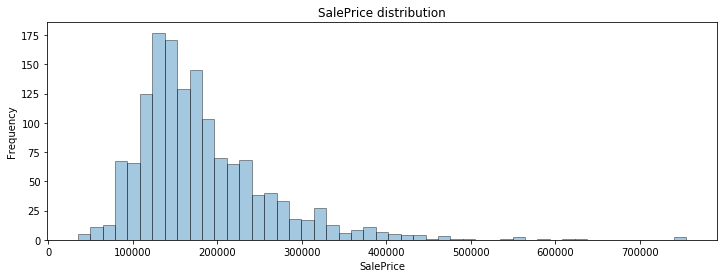

In [9]:
plt.figure(figsize = (12,4))
ax = sns.distplot(df['SalePrice'], hist_kws = {'edgecolor':'black'}, kde = False)
ax.set(title = 'SalePrice distribution', ylabel = 'Frequency')
plt.show()

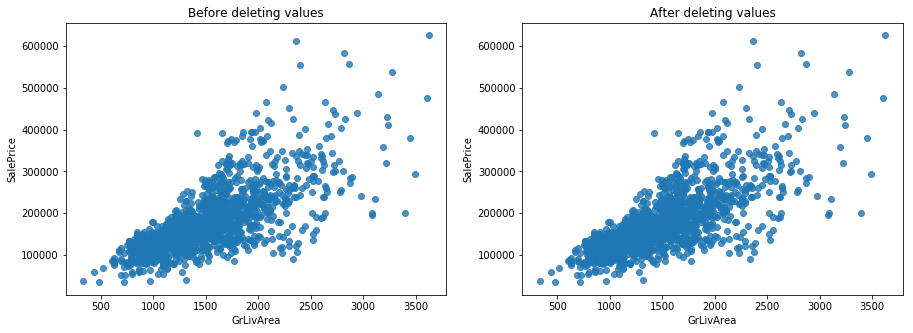

In [22]:
plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
g = sns.regplot(x= df['GrLivArea'], y= df['SalePrice'], fit_reg = False).set_title('Before deleting values')

# Delete some outliers
plt.subplot(1,2,2)
df = df.drop(df[df['GrLivArea']>4000].index)
g = sns.regplot(x=df['GrLivArea'], y = df['SalePrice'], fit_reg = False).set_title('After deleting values')

In [33]:
print('Skewness: %f' %df['SalePrice'].skew())
print('Kurtosis: %f' %df['SalePrice'].kurt())

Skewness: 1.565959
Kurtosis: 3.885283


## Missing values

In [20]:
total = df.isnull().sum()
percent = (df.isnull().sum()/len(df))*100

missing_data = pd.concat([total,percent], axis = 1, keys = ['Total','Percent']).sort_values(by = 'Total', ascending = False).reset_index()
missing_data = missing_data.loc[missing_data['Total'] != 0]
missing_data

,index,Total,Percent
0,PoolQC,1451,99.656593
1,MiscFeature,1402,96.291209
2,Alley,1365,93.750000
3,Fence,1176,80.769231
4,FireplaceQu,690,47.390110
5,LotFrontage,259,17.788462
6,GarageYrBlt,81,5.563187
7,GarageCond,81,5.563187
8,GarageType,81,5.563187
9,GarageFinish,81,5.563187


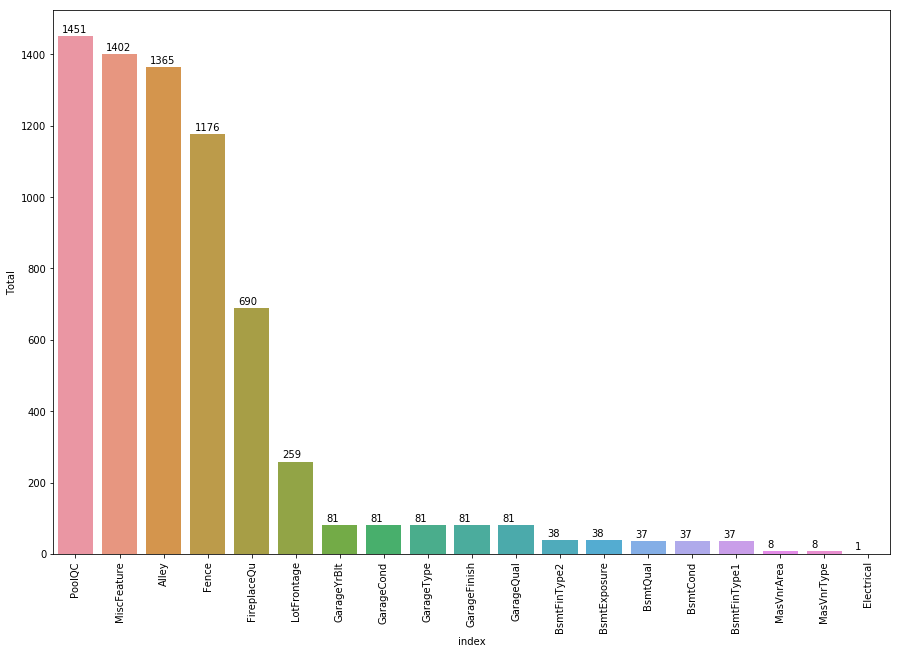

In [21]:
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(rotation = 90)
ax = sns.barplot(x='index', y='Total', data = missing_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1, height+10, '%.0f'%(height))

## Correlation matrix

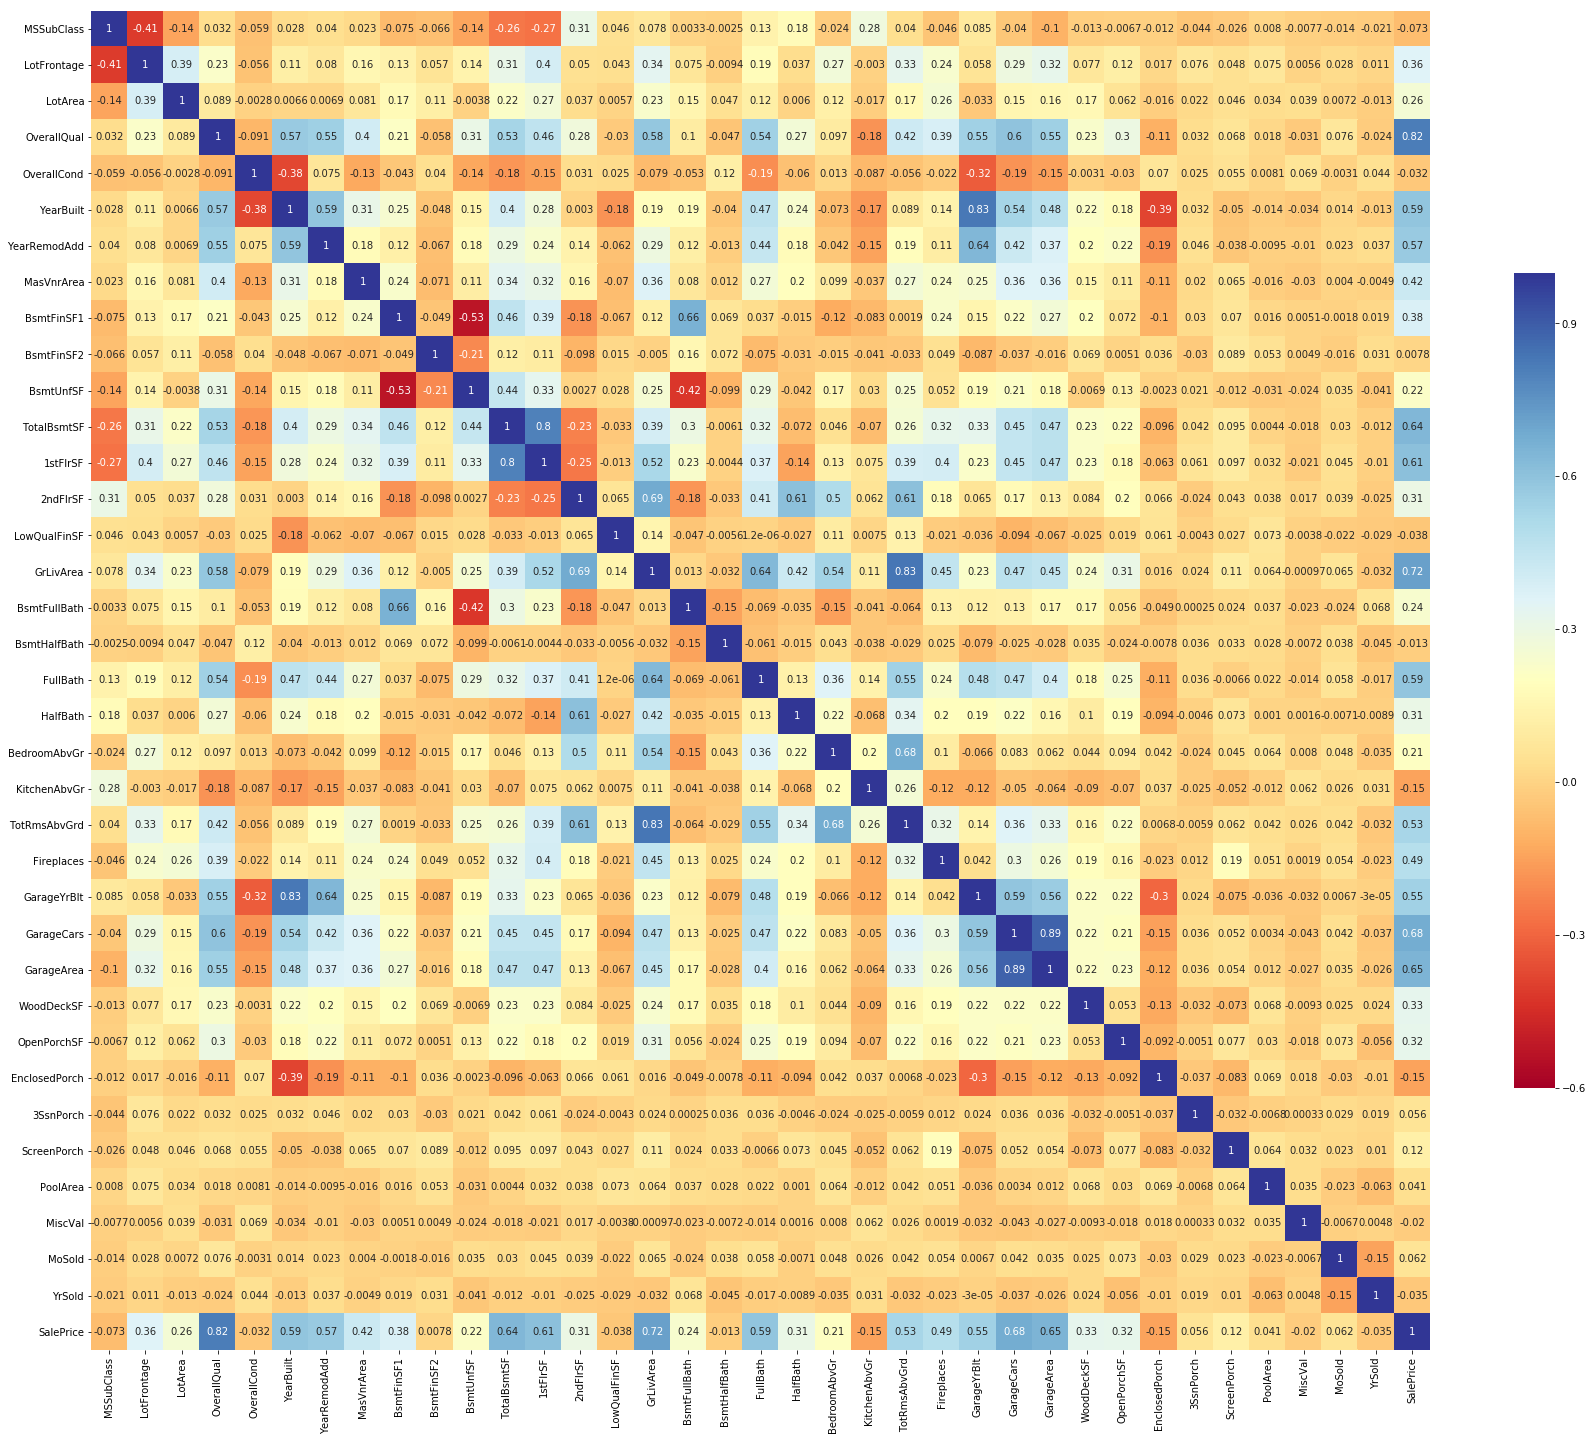

In [36]:
#plt.figure(figsize = (15,12))
#sns.heatmap(df_train.corr(), vmax = 1, square = True)

corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.subplots(figsize = (30,30))
sns.heatmap(corr, cmap="RdYlBu", vmax = 1, vmin = -0.6, center = 0.2, square = True, linewidths=0, 
            cbar_kws={"shrink": .5}, annot = True)

In [41]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']

print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.8169131926312898
GrLivArea: 	0.7153089445201752
GarageCars: 	0.6796918978502036
GarageArea: 	0.6536369463400951
TotalBsmtSF: 	0.6383954153177903
1stFlrSF: 	0.6102417273122256
FullBath: 	0.5901628646832278
YearBuilt: 	0.5899863398162428
YearRemodAdd: 	0.5697705378812202
GarageYrBlt: 	0.5451777609541418
TotRmsAbvGrd: 	0.5309795301571386
Fireplaces: 	0.48617973484357085
MasVnrArea: 	0.4247015687546382
BsmtFinSF1: 	0.3803669618519155
LotFrontage: 	0.3618599493863489
WoodDeckSF: 	0.32956960839123256
OpenPorchSF: 	0.32437359624689116
HalfBath: 	0.31184903734442243
2ndFlrSF: 	0.3055870264633586
LotArea: 	0.25684302602974757
BsmtFullBath: 	0.23807664518251453
BsmtUnfSF: 	0.2220906104129699
BedroomAbvGr: 	0.20701987285420761
EnclosedPorch: 	-0.14939751887792044
KitchenAbvGr: 	-0.14747611096702384
ScreenPorch: 	0.12392654824064042
MSSubClass: 	-0.07348140473880829
MoSold: 	0.062046138554654434
3SsnPorc

### 'SalePrice' correlation matrix (zoomed heatmap style)

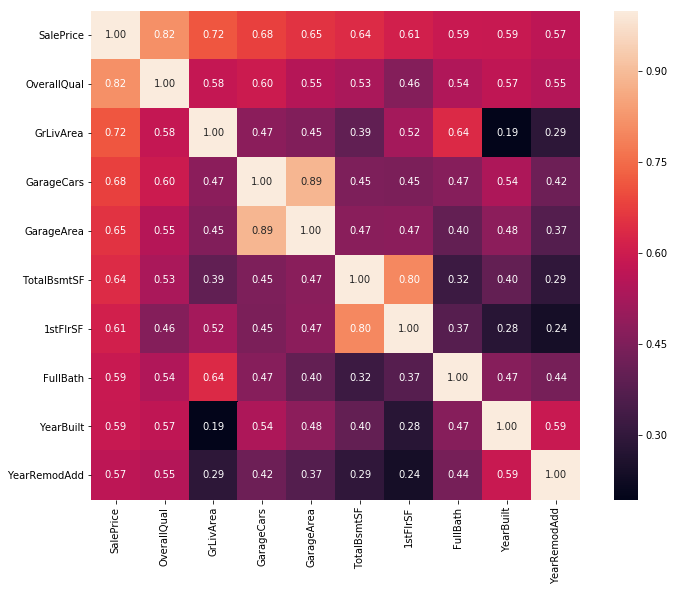

In [38]:
k=10
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize = (12,9))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

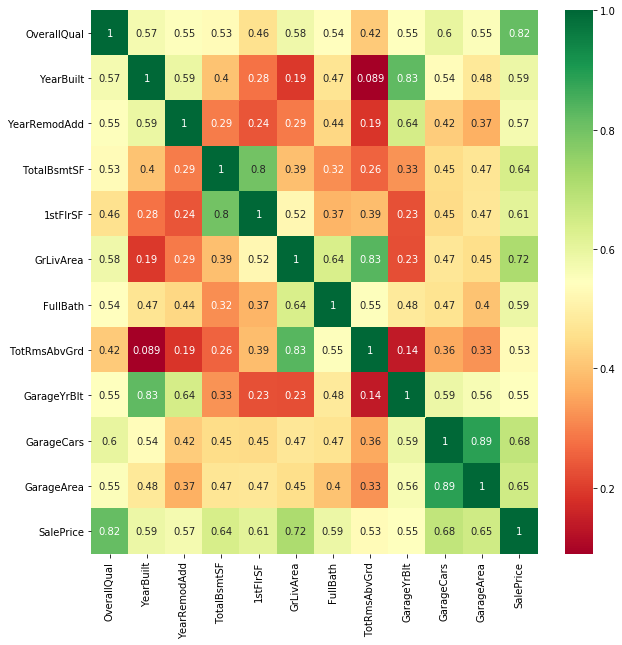

In [43]:
# THE SAME like cell above
# most correlated features

corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 'GarageCars' and 'GarageArea'  - left only 'GarageCars'
# 'TotalBsmtSF' and '1stFloor' - left 'TotalBsmtSF'
# 'TotRmsAbvGrd' and 'GrLivArea' left 'GrLivArea'

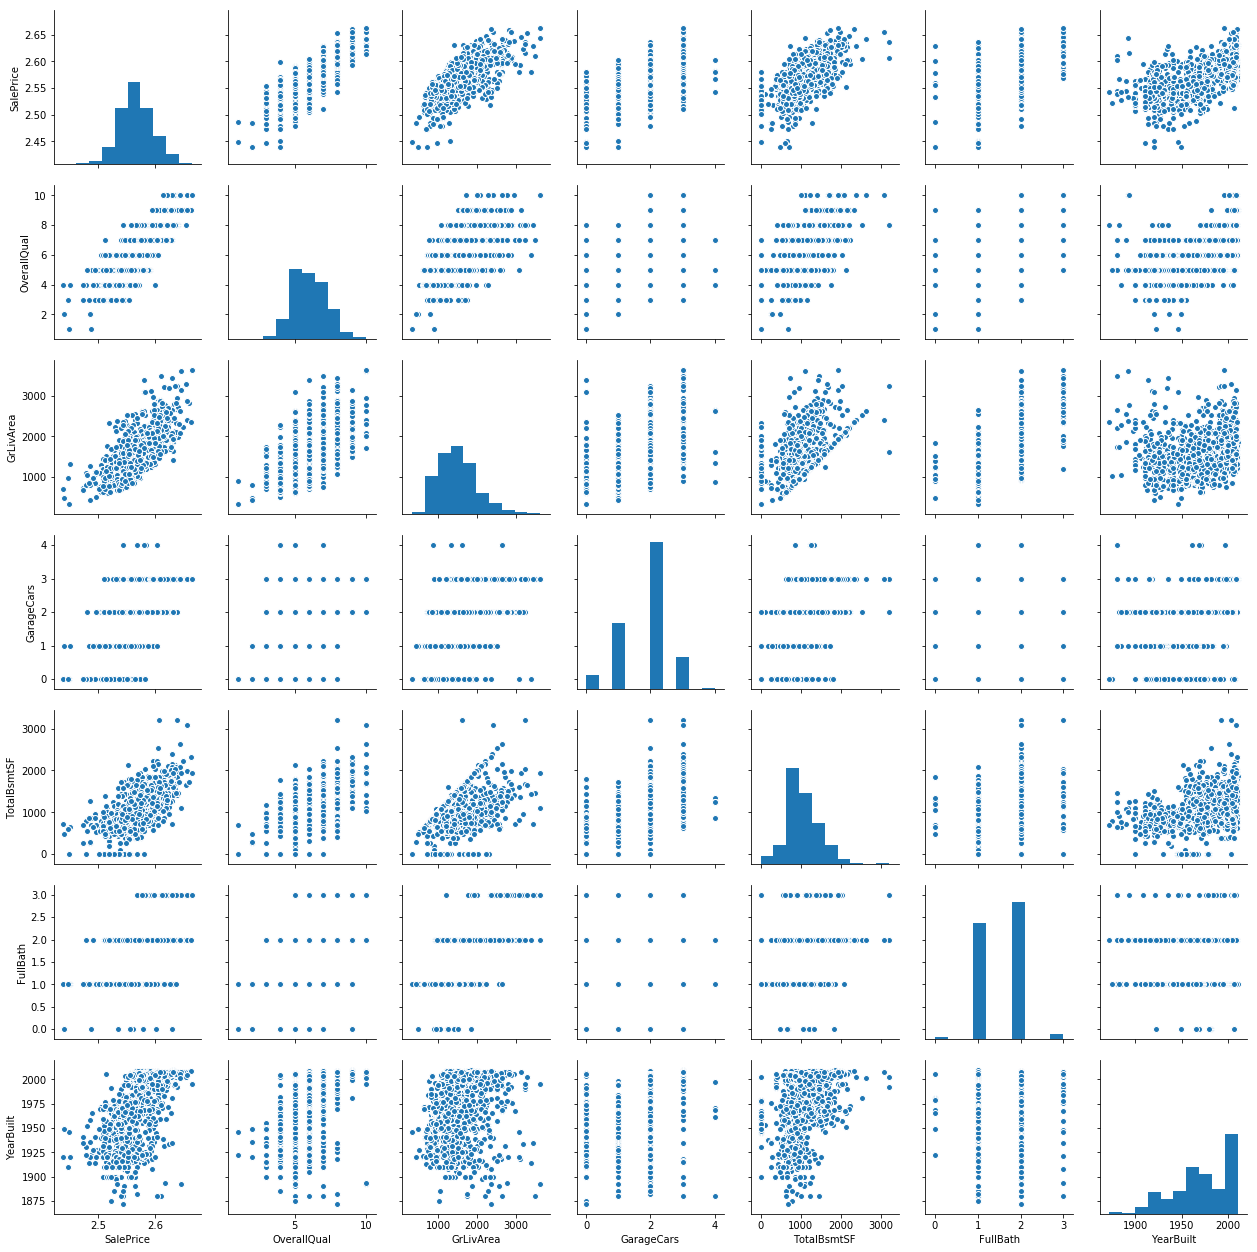

In [45]:
# Scatterplots between SalePrice and most collelated variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

### more detailed visualization

<Figure size 432x288 with 0 Axes>

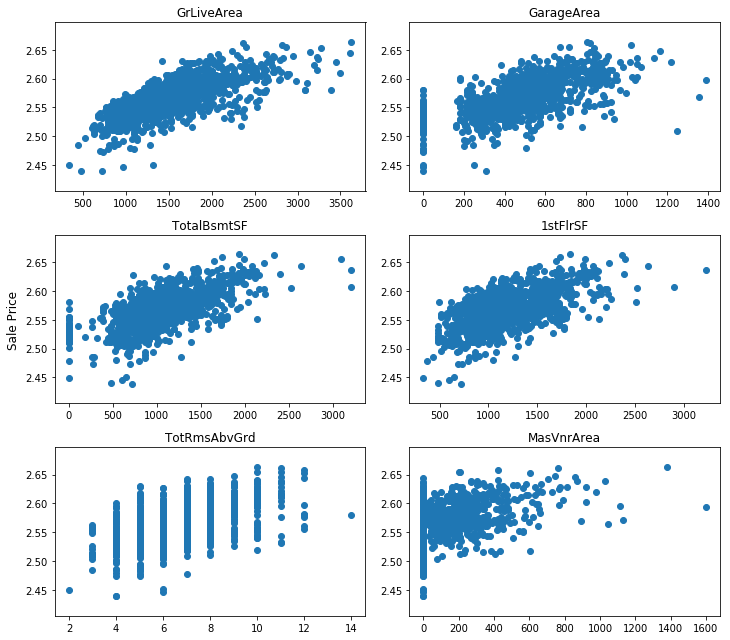

In [46]:
# more detailed visualization
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

### YearBuilt

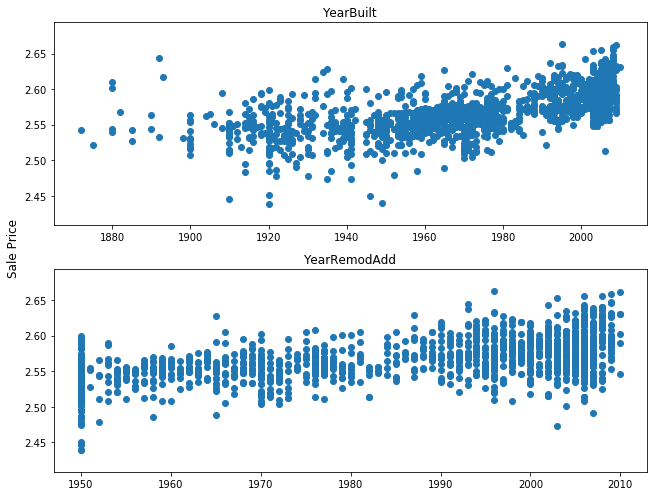

In [60]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(df.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(df.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()


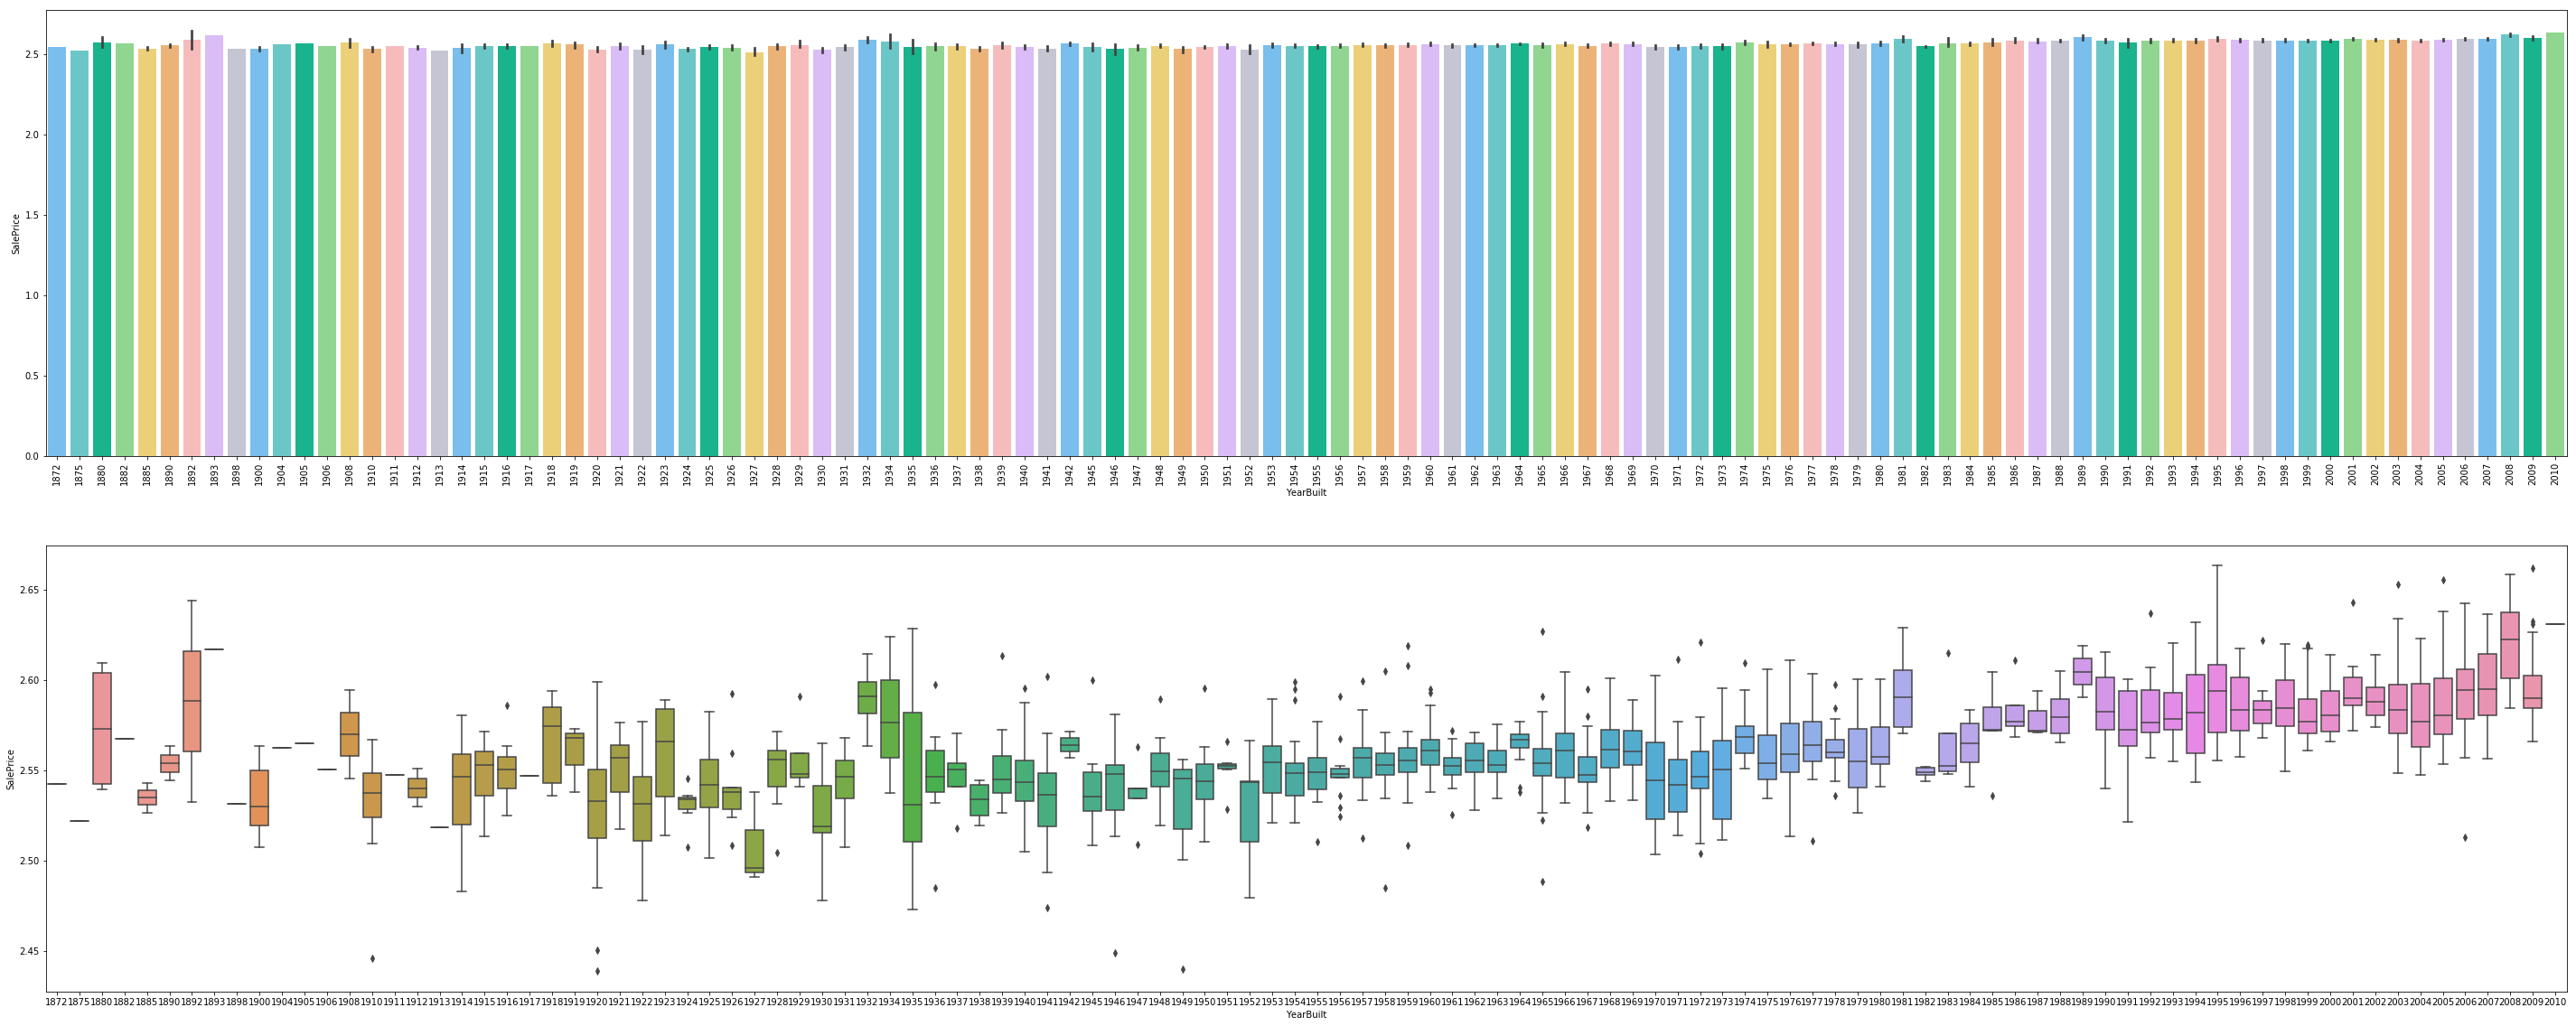

In [90]:
plt.subplots(figsize =(50, 20))
plt.subplot(211)
plt.xticks(rotation = 90)
sns.barplot(x="YearBuilt", y="SalePrice", data=df, palette = mycols)

plt.subplot(212)
sns.boxplot(x='YearBuilt', y="SalePrice", data=df)

### TotalBsmtSF

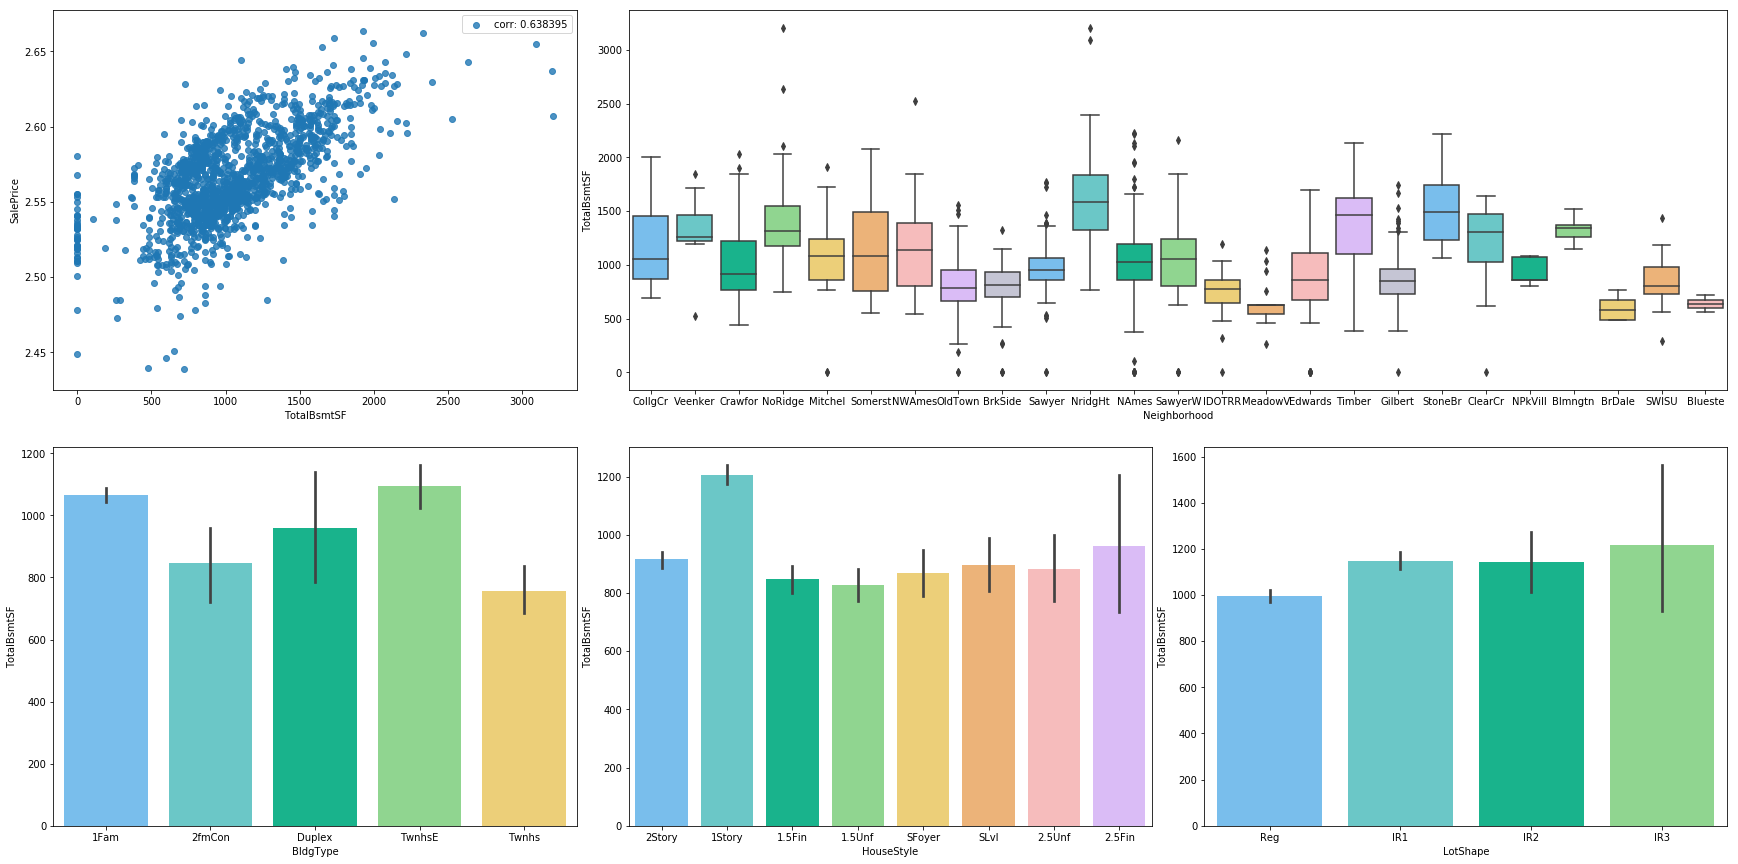

In [50]:
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
#sns.set_palette(palette = mycols, n_colors = 4)

grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=df['TotalBsmtSF'], y=df['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(df['TotalBsmtSF'], df['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalBsmtSF", data=df, palette = mycols)

plt.subplot(grid[1, 0])
sns.barplot(x="BldgType", y="TotalBsmtSF", data=df, palette = mycols)

plt.subplot(grid[1, 1])
sns.barplot(x="HouseStyle", y="TotalBsmtSF", data=df, palette = mycols)

plt.subplot(grid[1, 2])
sns.barplot(x="LotShape", y="TotalBsmtSF", data=df, palette = mycols);

### Bathrooms

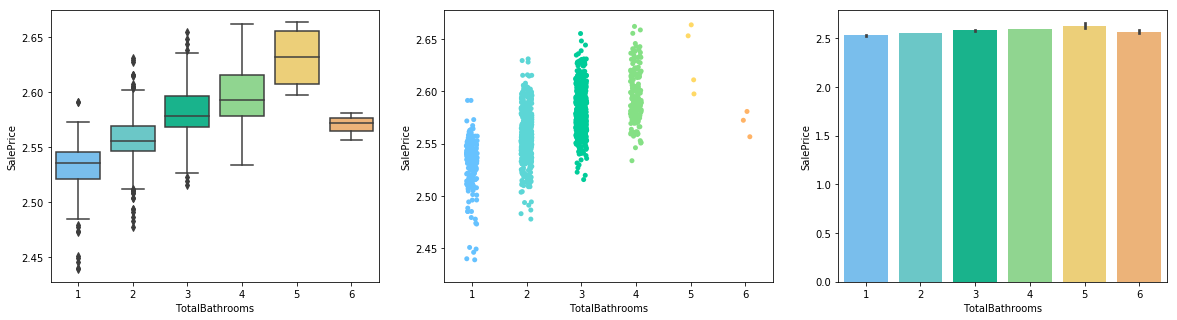

In [53]:
df['TotalBathrooms'] = df['BsmtHalfBath'] + df['BsmtFullBath'] + df['HalfBath'] + df['FullBath']
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="TotalBathrooms", y="SalePrice", data=df, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="TotalBathrooms", y="SalePrice", data=df, size = 5, jitter = True, palette = mycols)

plt.subplot(1, 3, 3)
sns.barplot(x="TotalBathrooms", y="SalePrice", data=df, palette = mycols)

### GrLivArea

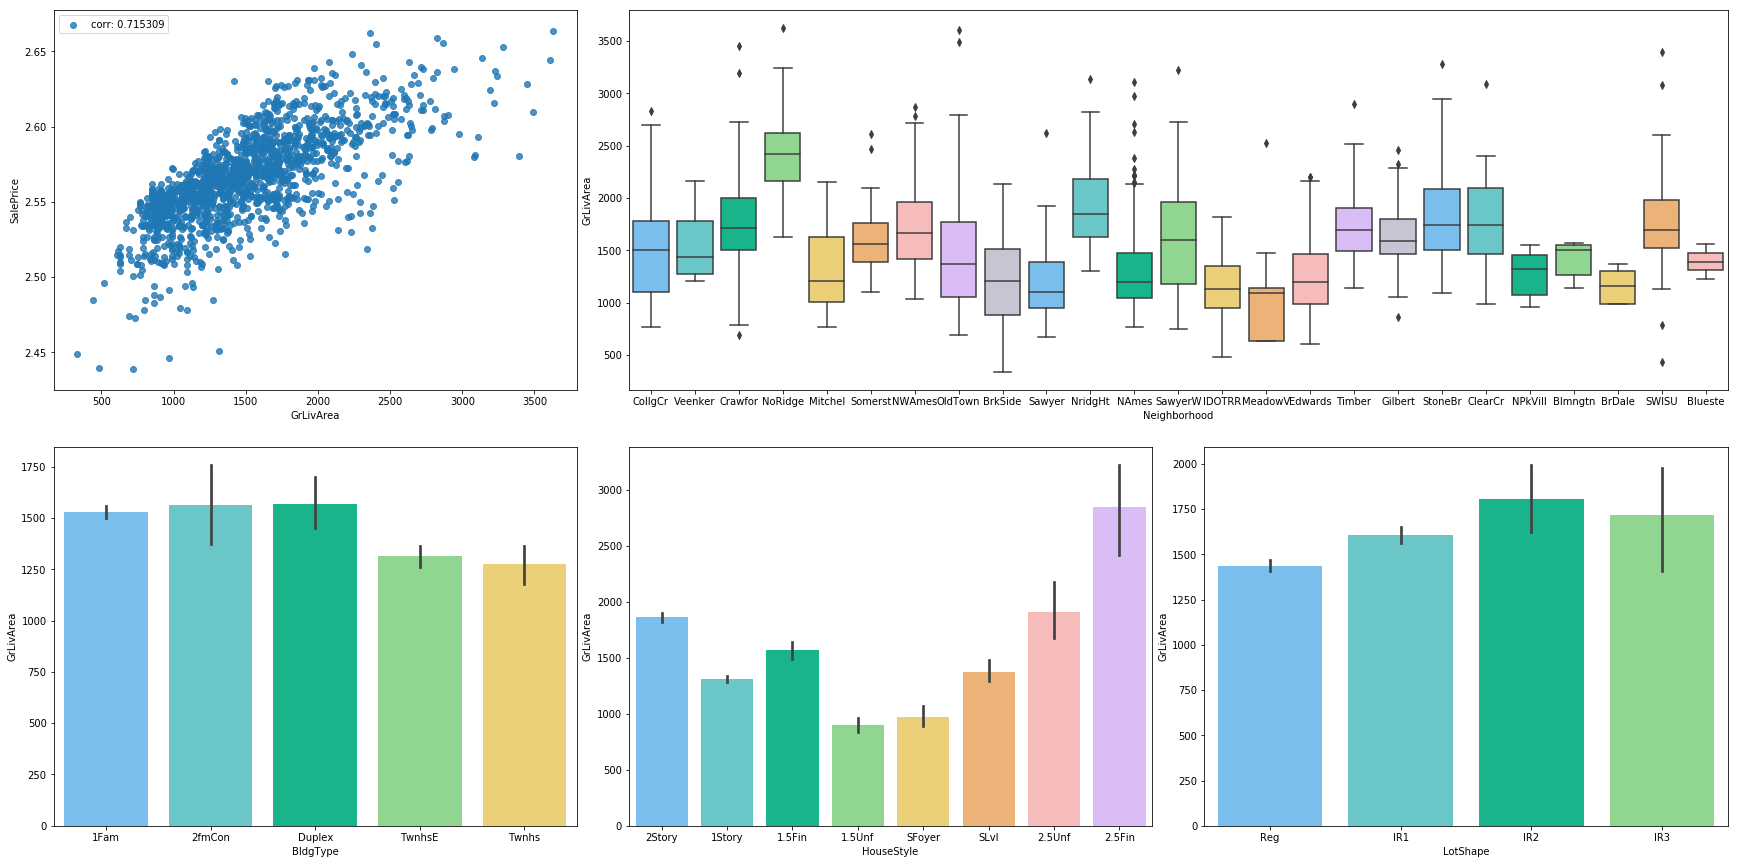

In [54]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=df['GrLivArea'], y=df['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(df['GrLivArea'], df['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GrLivArea", data=df, palette = mycols)

plt.subplot(grid[1, 0])
sns.barplot(x="BldgType", y="GrLivArea", data=df, palette = mycols)

plt.subplot(grid[1, 1])
sns.barplot(x="HouseStyle", y="GrLivArea", data=df, palette = mycols)

plt.subplot(grid[1, 2])
sns.barplot(x="LotShape", y="GrLivArea", data=df, palette = mycols)

### OverallQual

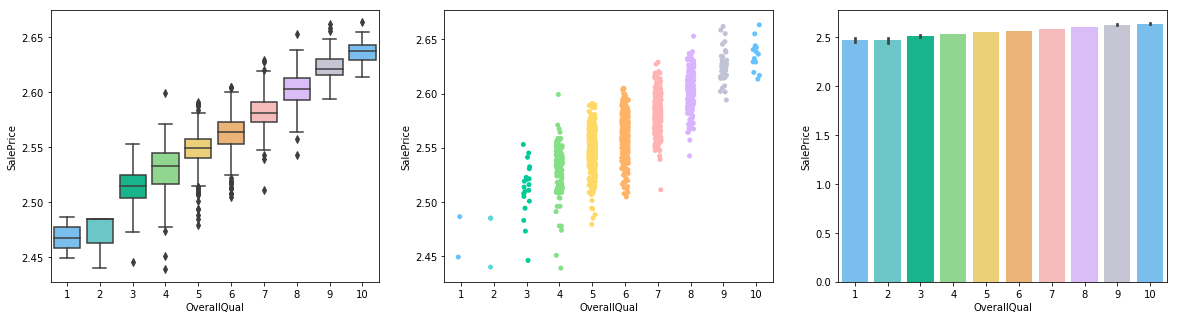

In [59]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=df, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallQual", y="SalePrice", data=df, size = 5, jitter = True, palette = mycols)

plt.subplot(1, 3, 3)
ax = sns.barplot(x="OverallQual", y="SalePrice", data=df, palette = mycols)

### GarageCars

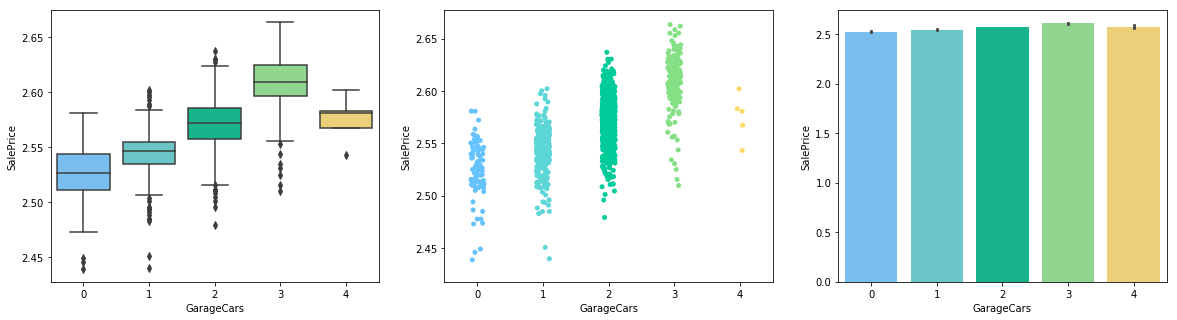

In [64]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageCars", y="SalePrice", data=df, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageCars", y="SalePrice", data=df, size = 5, jitter = True, palette = mycols)

plt.subplot(1, 3, 3)
sns.barplot(x="GarageCars", y="SalePrice", data=df, palette = mycols)

### GarageArea

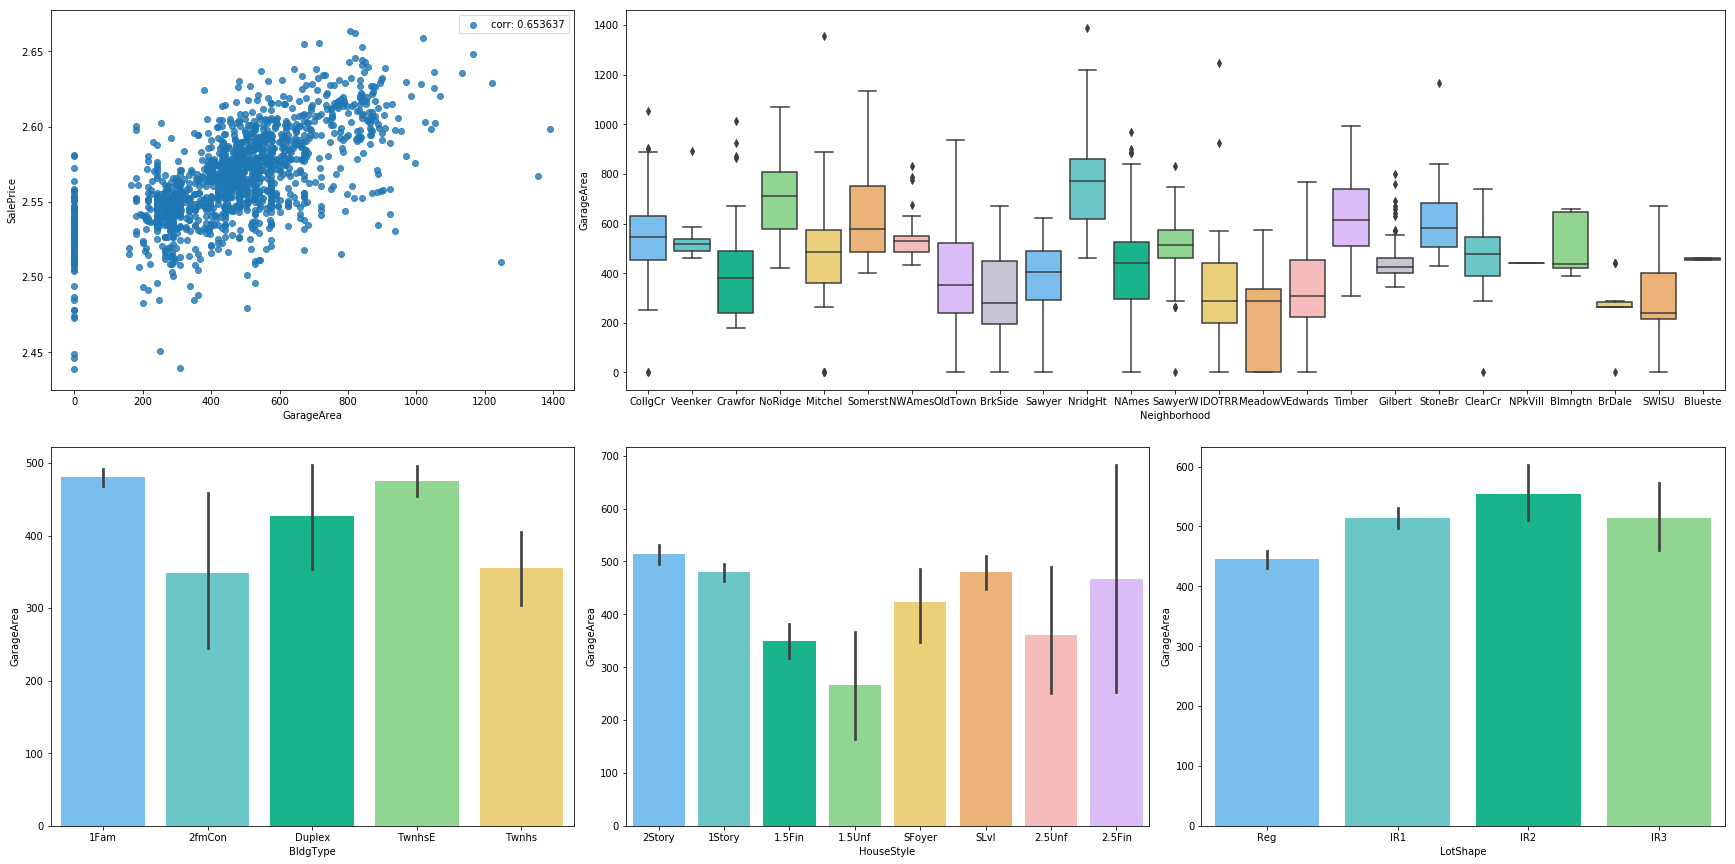

In [66]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=df['GarageArea'], y=df['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(df['GarageArea'], df['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GarageArea", data=df, palette = mycols)

plt.subplot(grid[1, 0])
sns.barplot(x="BldgType", y="GarageArea", data=df, palette = mycols)

plt.subplot(grid[1, 1])
sns.barplot(x="HouseStyle", y="GarageArea", data=df, palette = mycols)

plt.subplot(grid[1, 2])
sns.barplot(x="LotShape", y="GarageArea", data=df, palette = mycols)

### MSZoning

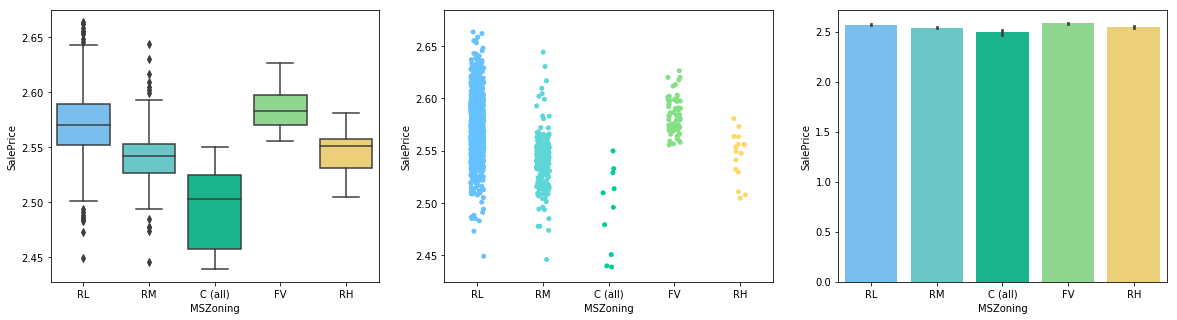

In [67]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSZoning", y="SalePrice", data=df, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MSZoning", y="SalePrice", data=df, size = 5, jitter = True, palette = mycols)

plt.subplot(1, 3, 3)
sns.barplot(x="MSZoning", y="SalePrice", data=df, palette = mycols)

### Kitchen Quality

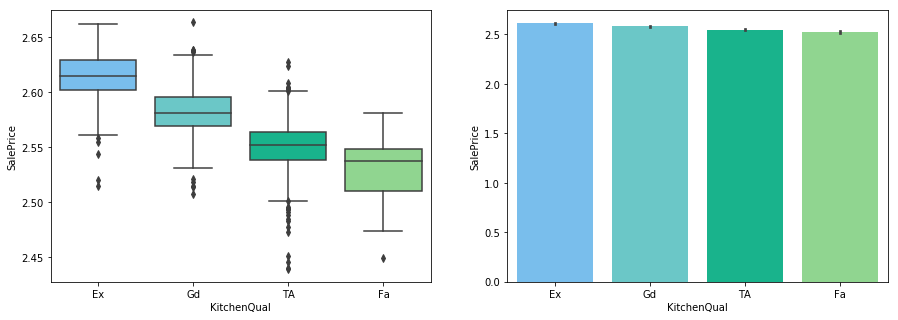

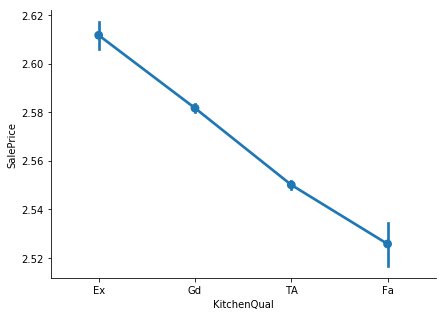

In [75]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=df, order=['Ex', 'Gd', 'TA', 'Fa'], palette = mycols)

plt.subplot(1, 2, 2)
sns.barplot(x="KitchenQual", y="SalePrice", data=df, order=['Ex', 'Gd', 'TA', 'Fa'], palette = mycols)

sns.factorplot(x='KitchenQual', y='SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = df, order = ['Ex', 'Gd', 'TA', 'Fa'])

### FireplaceQu

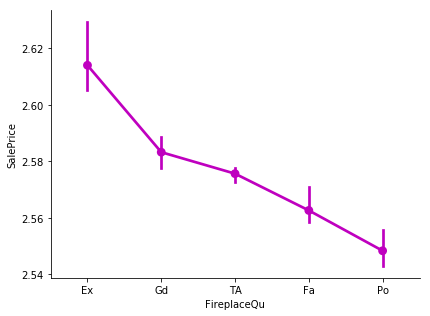

In [80]:
sns.factorplot('FireplaceQu', 'SalePrice', data = df, color = 'm', estimator = np.median, 
               order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

### HeatingQC

In [77]:
pd.crosstab(df.HeatingQC, df.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,8,729
Fa,24,25
Gd,13,228
Po,1,0
TA,49,379


In [78]:
pd.crosstab(df.HeatingQC, df.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
HeatingQC,,,,,
Ex,21,14,252,4,159
Fa,0,1,13,1,5
Gd,2,3,45,5,57
TA,0,15,68,10,91


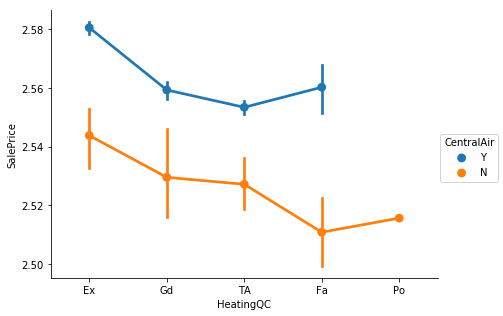

In [79]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = df, size = 4.5, aspect = 1.4)

### Neighborhood


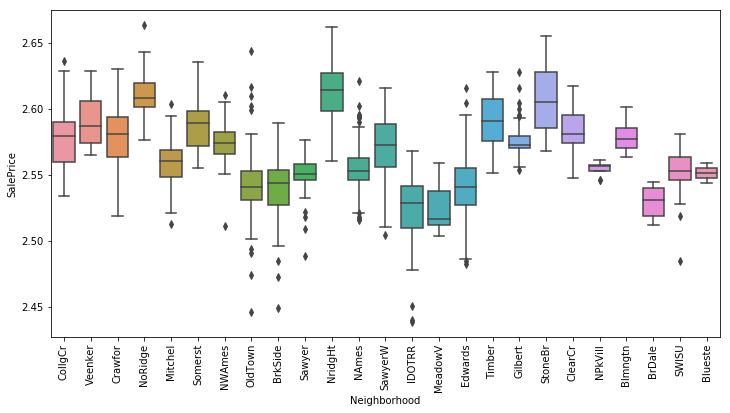

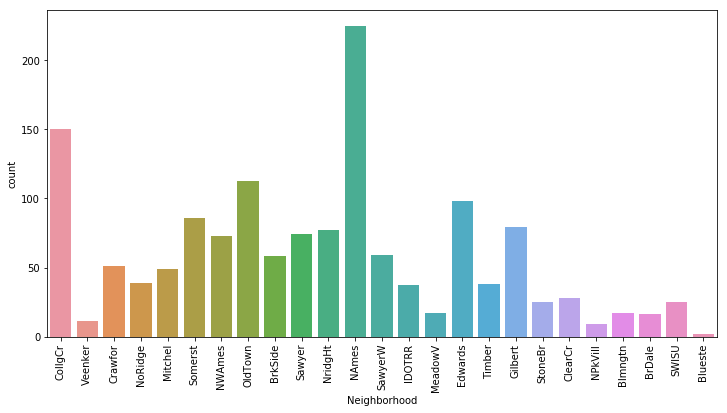

In [84]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=90)

plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df)
xt = plt.xticks(rotation=90)

### Housing Price vs Sales

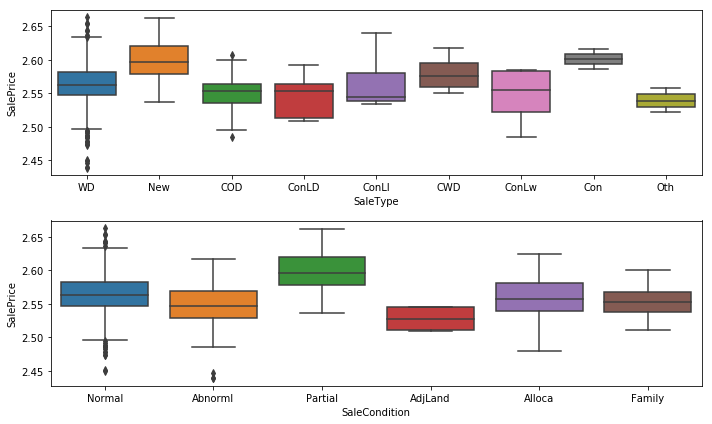

In [85]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()

### Housing Condition

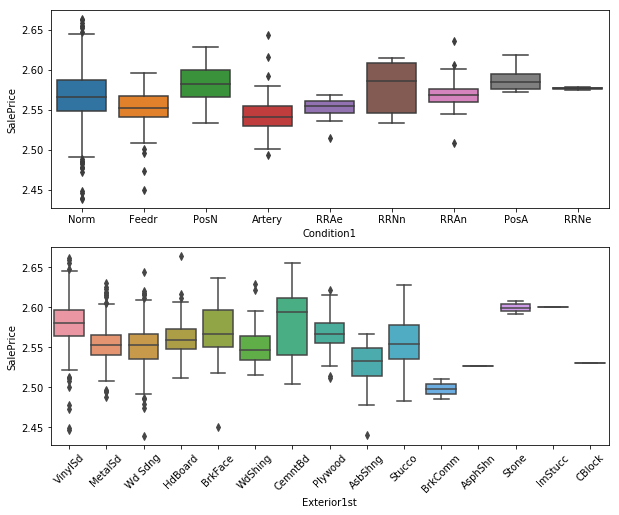

In [86]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

### Basement Conditions

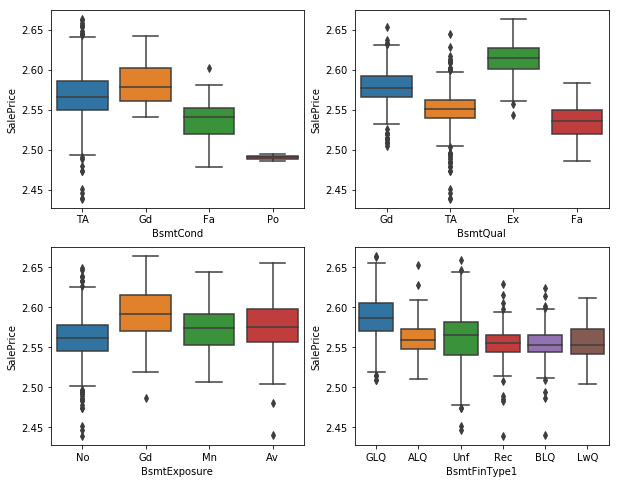

In [87]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = df, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = df, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = df, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = df, ax = ax[1, 1])

## Preparing data - check for normality

### SalePrice

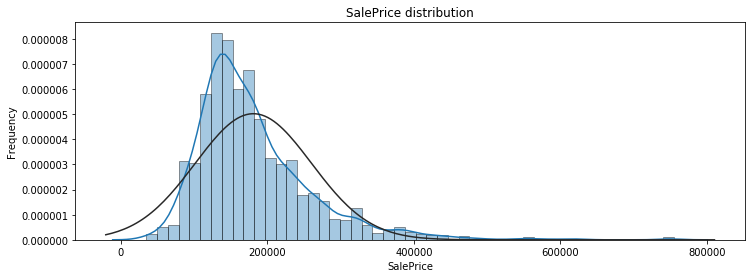

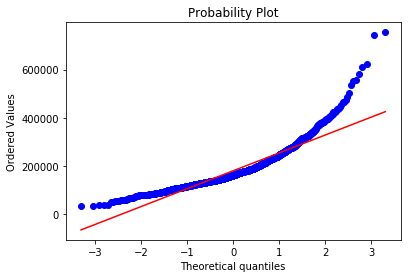

In [106]:
plt.figure(figsize = (12,4))
ax = sns.distplot(df['SalePrice'], hist_kws = {'edgecolor':'black'}, fit = norm)
ax.set(title = 'SalePrice distribution', ylabel = 'Frequency')
plt.show()

stats.probplot(df['SalePrice'], plot=plt)
plt.show()

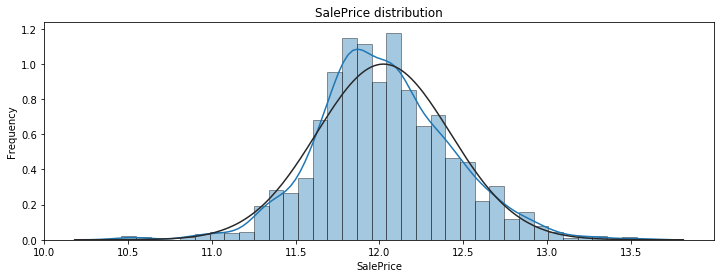

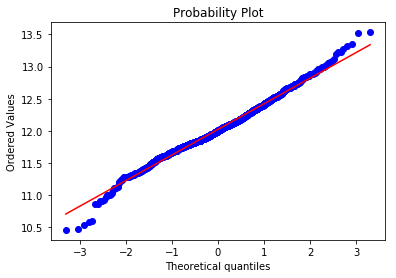

In [118]:
# Log Transformation
df['SalePrice'] = np.log1p(df['SalePrice'])

plt.figure(figsize = (12,4))
ax = sns.distplot(df['SalePrice'], hist_kws = {'edgecolor':'black'}, fit = norm)
ax.set(title = 'SalePrice distribution', ylabel = 'Frequency')
plt.show()

stats.probplot(df['SalePrice'], plot=plt)
plt.show()


### GrLivArea

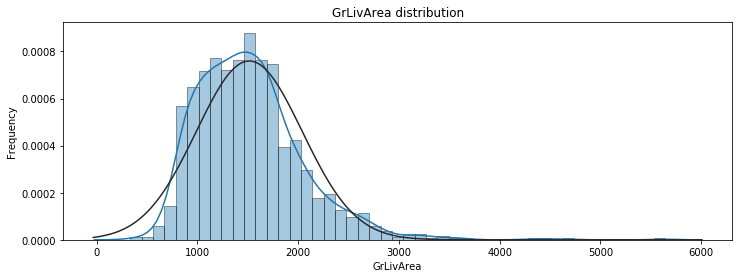

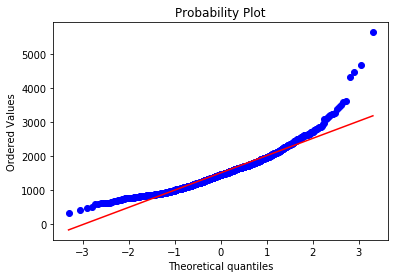

In [119]:
plt.figure(figsize = (12,4))
ax = sns.distplot(df['GrLivArea'], hist_kws = {'edgecolor':'black'}, fit = norm)
ax.set(title = 'GrLivArea distribution', ylabel = 'Frequency')
plt.show()

stats.probplot(df['GrLivArea'], plot=plt)
plt.show()

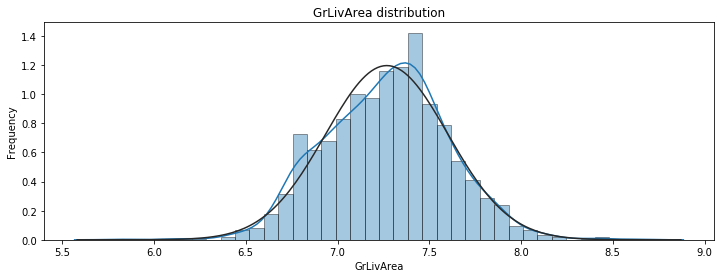

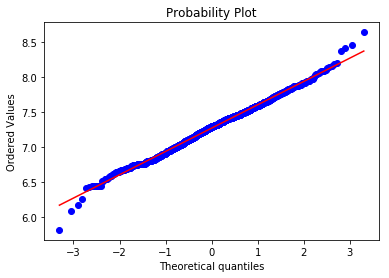

In [124]:
# Log Transformation
df['GrLivArea'] = np.log1p(df['GrLivArea'])

plt.figure(figsize = (12,4))
ax = sns.distplot(df['GrLivArea'], hist_kws = {'edgecolor':'black'}, fit = norm)
ax.set(title = 'GrLivArea distribution', ylabel = 'Frequency')
plt.show()

stats.probplot(df['GrLivArea'], plot=plt)
plt.show()

### TotalBsmtSF

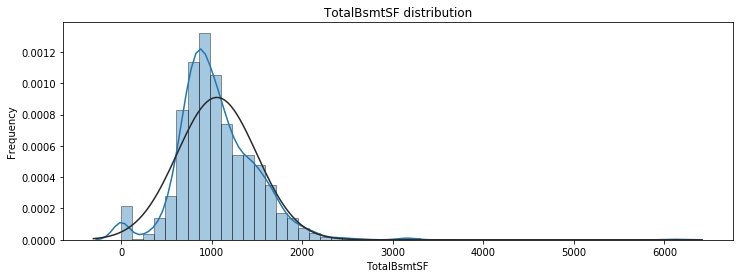

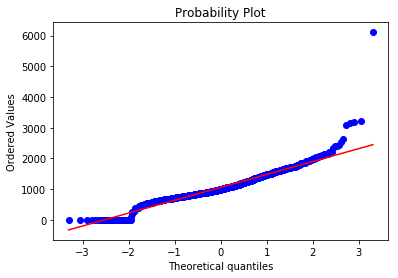

In [125]:
plt.figure(figsize = (12,4))
ax = sns.distplot(df['TotalBsmtSF'], hist_kws = {'edgecolor':'black'}, fit = norm)
ax.set(title = 'TotalBsmtSF distribution', ylabel = 'Frequency')
plt.show()

stats.probplot(df['TotalBsmtSF'], plot=plt)
plt.show()

### A big problem because the value zero doesn't allow us to do log transformations

In [126]:
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log1p(df['TotalBsmtSF'])

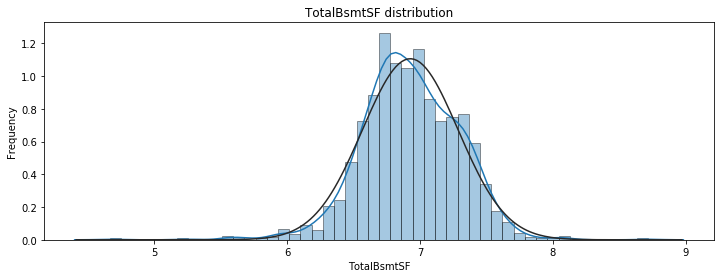

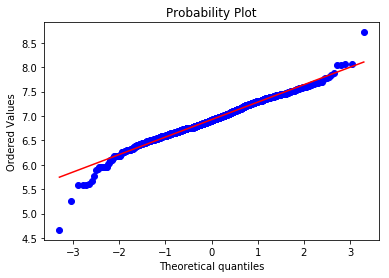

In [129]:
plt.figure(figsize = (12,4))
ax = sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], hist_kws = {'edgecolor':'black'}, fit = norm)
ax.set(title = 'TotalBsmtSF distribution', ylabel = 'Frequency')
plt.show()

stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)
plt.show()

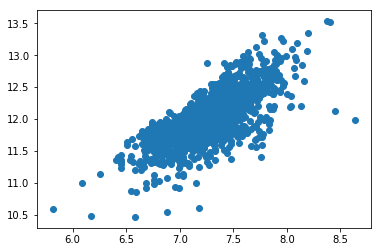

In [115]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

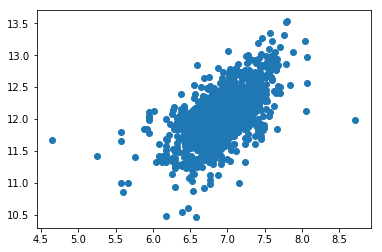

In [116]:
plt.scatter(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], df[df['TotalBsmtSF']>0]['SalePrice'])